# détection d'intrusion : projet de datascience 

## Description de la méthode

### Étape 0 : Analyse exploratoire des données (EDA)
- Comprendre la structure et les caractéristiques de la dataset CSE-CIC-IDS2018: origine, objectif et composition
- Identifier les types de données, les valeurs manquantes, les outliers

- visualiser les statistique generale de chaque sous ensemble de la dataset
- Analyser les corrélations entre les variables pour identifier les redondances potentielles

## Étape 1 : pretraitement de donnees
- conversion des données au format adapte ( par exemple les timesstamp) 
- Traiter les valeurs manquantes si nécessaire (imputation, suppression)
- Appliquer une méthode de normalisation adaptée au type de modèle utilisé (standardisation, mise à l'échelle min-max, etc.)


### Étape 3 : Validation croisée
- Diviser les données en jeux d'entraînement et de test
- Réaliser une validation croisée à 10 plis sur le jeu d'entraînement

### Étape 4 : Construction du modèle
- Entraîner plusieurs modèle (arbre de décision, CNN, Autoencoder, MLP)  sur l'ensemble des données d'entraînement  pour determiner l'algorithme 
- Optimiser les hyperparamètres du modèle (profondeur, nombre de feuilles, etc.)

### Étape 5 : Évaluation finale
- Évaluer les performances du modèle optimisé sur le jeu de test
- Calculer les métriques d'évaluation (précision, rappel, F1-score, matrice de confusion)
- Analyser les résultats et identifier les points forts et faibles du modèle

# ETAPE 0


#### 1.   Origine de la dataset : La CSE-CIC-IDS2018 est le fruit d’une collaboration entre le Communications Security Establishment (CSE) et l’Institut canadien de cybersécurité (CIC). Elle a été conçue spécifiquement pour developper  les systèmes de détection d’intrusion (IDS) 

#### 2.   Objectif : L’objectif principal était de créer un ensemble de données complet et diversifié pour l’évaluation des détecteurs d’anomalies basés sur le réseau et combler les lacunes de dataset comme la KDD99 qui refletait pas vraiment le comportement d'un reseau dans le monde reel 

#### 3.   Génération systématique : La méthode utilisée pour générer cette dataset repose sur des profils d’utilisateurs. Ces profils contiennent des descriptions détaillées d’intrusions et des modèles de distribution abstraits pour les applications, les protocoles ou les entités réseau de niveau inférieur. Ces profils peuvent être utilisés pour générer des événements sur le réseau.

#### 4. Composition de la dataset : La CSE-CIC-IDS2018 comprend sept scénarios d’attaque différents : Brute-force, Heartbleed, Botnet, DoS, DDoS, attaques Web et infiltration du réseau depuis l’intérieur. L’infrastructure d’attaque comprend 50 machines, tandis que l’organisation victime compte 5 départements avec 420 machines et 30 serveurs. La dataset inclut le trafic réseau capturé ainsi que les journaux système de chaque machine, avec 80 caractéristiques extraites du trafic capturé à l’aide de CICFlowMeter-V312.


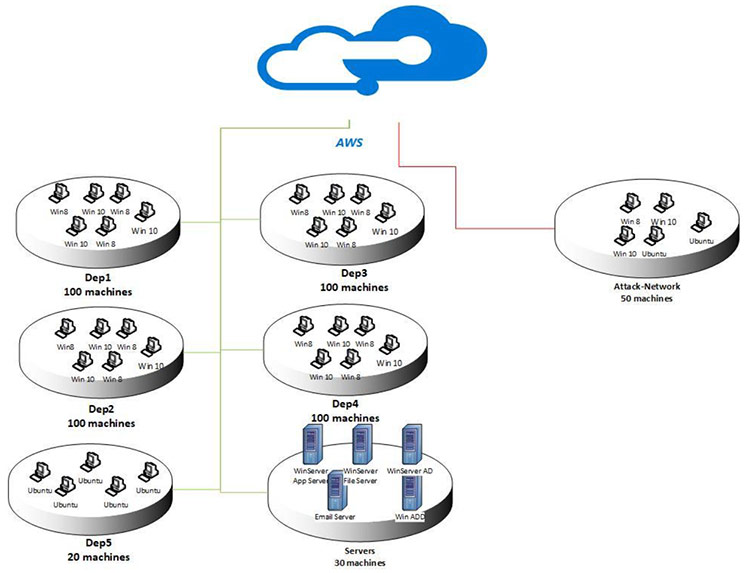 

ARCHITECTURE DU SD-WAN

### Voici le récapitulatif des principales actifs

| Caractéristique | Détail | Unité |
|-----------------|--------|-------|
| Attaques incluses | Brute-force, Heartbleed, Botnet, DoS, DDoS, Web, Infiltration | - |
| Infrastructure attaquante | 50 machines | - |
| Organisation victime | 5 départements, 420 machines, 30 serveurs | - |
| Durée de capture | 10 jours | jours |
| Trafic capturé | Trafic réseau (PCAP) et logs système | - |
| Nombre de machines | 50 machines attaquantes, 420 machines victimes | machines |
| Nombre de serveurs | 30 serveurs | serveurs |
| Nombre de départements | 5 départements | départements |
| Nombre de caractéristiques extraites | 84 | - |
| Sens des flux | Bidirectionnel (source->dest et dest->source) | - |
| Format des données | PCAP (trafic brut), CSV (descriptions de flux) | - |
| Outil d'extraction | CICFlowMeter-V3 | - |
| Taille du dataset final | Environ 5 millions d'enregistrements | enregistrements |


Voici le tableau redimensionné avec les colonnes demandées :

| Catégorie | Champ | Description | Catégorie | Champ | Description |
|-----------|-------|-------------|-----------|-------|-------------|
| **Informations de base** | Flow ID | Identifiant unique du flux | **Informations de timing** | Timestamp | Horodatage du début du flux |
| | Src IP | Adresse IP source | | Flow Duration | Durée du flux |
| | Src Port | Numéro de port source | | Total Fwd Packets | Nombre total de paquets source->destination |
| | Dst IP | Adresse IP destination | | Total Bwd Packets | Nombre total de paquets destination->source |
| | Dst Port | Numéro de port destination | | Protocol | Protocole de communication |
| **Informations de timing** | Flow Bytes/s | Débit du flux en octets par seconde | **Informations de paquets** | Total Length of Fwd Packets | Longueur totale des paquets source->destination |
| | Flow Packets/s | Débit du flux en paquets par seconde | | Total Length of Bwd Packets | Longueur totale des paquets destination->source |
| | Flow IAT Mean | Intervalle moyen entre les paquets | | Fwd Packet Length Max | Longueur maximale des paquets source->destination |
| | Flow IAT Std | Écart type des intervalles entre les paquets | | Fwd Packet Length Min | Longueur minimale des paquets source->destination |
| **Informations de paquets** | Fwd Packet Length Mean | Longueur moyenne des paquets source->destination | **Informations de flux** | Flow IAT Max | Intervalle maximal entre les paquets |
| | Fwd Packet Length Std | Écart type des longueurs des paquets source->destination | | Flow IAT Min | Intervalle minimal entre les paquets |
| | Bwd Packet Length Max | Longueur maximale des paquets destination->source | **Informations de TCP** | Init Win bytes forward | Taille de la fenêtre d'initialisation TCP source->destination |
| | Bwd Packet Length Min | Longueur minimale des paquets destination->source | | Init Win bytes backward | Taille de la fenêtre d'initialisation TCP destination->source |
| **Informations de flux** | Flow Packets/s | Débit du flux en paquets par seconde | **Informations de UDP** | UDP packet length | Longueur d'un paquet UDP |
| | Flow IAT Mean | Intervalle moyen entre les paquets | **Informations de ICMP** | ICMP type | Type de message ICMP |
| **Informations de TCP** | act_data_pkt_fwd | Nombre de paquets de données source->destination | **Informations de labels** | Label | Étiquette d'attaque ou de trafic légitime |
| **Informations de UDP** | UDP packet length | Longueur d'un paquet UDP | **Informations de labels** | Label | Étiquette d'attaque ou de trafic légitime |
| **Informations de ICMP** | ICMP type | Type de message ICMP | **Informations de labels** | Label | Étiquette d'attaque ou de trafic légitime |

Ce tableau redimensionné permet de visualiser les caractéristiques du dataset CSE-CIC-IDS2018 en deux parties distinctes, avec des colonnes pour les catégories et les champs respectifs.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.layers import  SimpleRNN
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Input
import warnings
warnings.filterwarnings('ignore')
print('okay bright')

okay bright


In [5]:
data1=pd.concat([pd.read_csv('../input/ids-intrusion-csv/02-14-2018.csv'),pd.read_csv('../input/ids-intrusion-csv/02-15-2018.csv'),pd.read_csv('../input/ids-intrusion-csv/03-02-2018.csv'),pd.read_csv('../input/ids-intrusion-csv/02-23-2018.csv'),pd.read_csv('../input/ids-intrusion-csv/02-22-2018.csv')])

In [6]:
data1.shape


(5242875, 80)

In [7]:
data1.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [8]:
data1.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [9]:
print (data1['Label'].unique())


['Benign' 'FTP-BruteForce' 'SSH-Bruteforce' 'DoS attacks-GoldenEye'
 'DoS attacks-Slowloris' 'Bot' 'Brute Force -Web' 'Brute Force -XSS'
 'SQL Injection']


In [12]:
# encodage binaire du champs Label
data1['Label'] = data1['Label'].replace({'Benign': 0, 'FTP-BruteForce': 1, 'SSH-Bruteforce': 1,
                                         'DoS attacks-GoldenEye': 1, 'DoS attacks-Slowloris': 1, 'Bot': 1, 'Brute Force -Web':1, 'Brute Force -XSS':1,'SQL Injection':1})

In [ ]:
# Vérifiez que les valeurs ont été correctement converties
print (data1['Label'].unique())


# formatage

In [ ]:
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'], errors='coerce')
data1['Timestamp'] = data1['Timestamp'].astype('int64') // 10**9


In [ ]:
data1.head()

In [ ]:
# Comptez les valeurs manquantes par étiquette
missing_values_by_label = data1.groupby('Label')['Flow Byts/s'].apply(lambda x: x.isnull().sum())
missing_values_by_label


In [ ]:
# Données
categories =[0,1]
valeurs = missing_values_by_label

# Tracer le graphe en bâtons
plt.figure(figsize=(5, 6))  
bars = plt.bar(categories, valeurs, width=0.01)  # Adjust the width as needed

# Ajouter les étiquettes des valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/10, yval, round(yval, 1), ha='center', va='bottom', fontsize=8)



# Ajouter des étiquettes pour les axes et le titre
plt.xticks(categories, ['0', '1'])

plt.xlabel('Catégories')
plt.ylabel('pourcentages')
plt.title('Graphe en bâtons')
plt.grid()

# Afficher le graphe
plt.show()

In [ ]:
# Calculer la médiane pour chaque groupe de 'Label'
median_by_label = data1.groupby('Label')['Flow Byts/s'].median()

# Remplacer les valeurs manquantes par la médiane correspondante
data1['Flow Byts/s'] = data1.apply(lambda row: median_by_label[row['Label']] if pd.isnull(row['Flow Byts/s']) else row['Flow Byts/s'], axis=1)

# Vérifier que les valeurs manquantes ont été correctement remplacées
missing_values_by_label_after = data1.groupby('Label')['Flow Byts/s'].apply(lambda x: x.isnull().sum())
print(missing_values_by_label_after)


In [ ]:
categories =[0,1]
valeurs = missing_values_by_label_after

# Tracer le graphe en bâtons
plt.figure(figsize=(5, 6))  
bars = plt.bar(categories, valeurs, width=0.01)  # Adjust the width as needed

# Ajouter les étiquettes des valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/10, yval, round(yval, 1), ha='center', va='bottom', fontsize=8)



# Ajouter des étiquettes pour les axes et le titre
plt.xticks(categories, ['0', '1'])

plt.xlabel('Catégories')
plt.ylabel('pourcentages')
plt.title('Graphe en bâtons')
plt.grid()

# Afficher le graphe
plt.show()

# valeurs infinis

In [ ]:
# Checking for large values.
inf_count = np.isfinite(data1.values).size - np.isfinite(data1.values).sum()
print(inf_count)

In [ ]:
# Données (valeurs des portions)
valeurs = [inf_count, data1.shape[0]]  # Remplacez ces valeurs par celles que vous souhaitez afficher

# Étiquettes pour les portions
labels = ['valeurs infini', 'valeur finis']

# Créer le diagramme de type "Camembert"
plt.figure(figsize=(6, 6))
plt.pie(valeurs, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'skyblue'])

# Ajouter un titre
plt.title('pourcentage de valeur finis')

# Afficher le diagramme
plt.show()


In [ ]:
#removing large values
data1 = data1[~data1.isin([np.inf, -np.inf]).any(axis=1)]


In [ ]:
# Checking for large values.
print(False in np.isfinite(data1).values)

# valeurs extreme

In [ ]:
inf_counts = []
extreme_counts = []

for col in data1.columns:
    col_data = data1[col]
    
    # Calculate the number of infinite values for this column
    inf_count = np.sum(~np.isfinite(col_data))
    inf_counts.append(inf_count)
    
    # Calculate the number of extreme values for this column
    mean = col_data.mean()
    std = col_data.std()
    extreme_count = np.sum((np.abs(col_data - mean) > 3 * std))
    extreme_counts.append(extreme_count)

feature_with_extremes = [(inf_count > 0) or (extreme_count > 0) for inf_count, extreme_count in zip(inf_counts, extreme_counts)]
feature_names = [col for col, extreme in zip(data1.columns, feature_with_extremes) if extreme]

In [ ]:
# Données
categories =feature_names
valeurs = data1[feature_names].values[0]

# Tracer le graphe en bâtons
plt.figure(figsize=(16, 6))  
bars = plt.bar(categories, valeurs)

# Ajouter les étiquettes des valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=8)


# Faire en sorte que les valeurs de l'ordonnée commencent à -1
plt.ylim(-0.02, max(valeurs) + 0.1)

# Ajouter un peu d'espace entre les barres
plt.subplots_adjust( wspace=2)  # wspace contrôle l'espace entre les barres
plt.xticks(rotation=90)
# Ajouter des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('pourcentages')
plt.title('valeurs extreme')
plt.grid()

# Afficher le graphe
plt.show()

In [ ]:
# Winsorisation des 1% des valeurs les plus élevées et les plus basses
for col in feature_names:
    lower_bound = data1[col].quantile(0.01)
    upper_bound = data1[col].quantile(0.95)
    data1.loc[(data1[col] < lower_bound) | (data1[col] > upper_bound), col] = data1.loc[(data1[col] < lower_bound) | (data1[col] > upper_bound), col].clip(lower_bound, upper_bound)

In [ ]:

# Combine the results
total_extreme_count = inf_counts + extreme_counts

print("Total number of extreme values:", total_extreme_count)

In [ ]:
data1

In [ ]:

def outliers(df):
    # Calculer la moyenne et l'écart type pour chaque colonne
    mean = df.mean()
    std = df.std()

    # Définir le seuil pour considérer une valeur comme outlier (par exemple, 3 écarts types)
    threshold = 3 * std

    # Repérer les outliers et compter leur nombre
    outliers = ((df < (mean - threshold)) | (df > (mean + threshold)))
    outlier_counts = outliers.sum()/df.shape[0]

    # Créer un dataframe pour stocker les nombres d'outliers
    return pd.DataFrame([outlier_counts], columns=df.columns)



# Fonction pour compter les valeurs nulles dans une DataFrame
def null_values(df):
    null_count_list = []
    for field in df.columns:
        null_count = ((df[field] == 0).sum())/df.shape[0]
        null_count_list.append(null_count)
    return pd.DataFrame([null_count_list], columns=df.columns)

def detype(data1,data8,data7):
    
# Appliquez ces types de données au deuxième dataframe
    type=(data1.dtypes).values
    for i in range(len(type)):
        if type[i] == np.int64:
            data8.iloc[:, i] = pd.to_numeric(data8.iloc[:, i], errors='coerce').fillna(0).astype(np.int64)
            data7.iloc[:, i] = pd.to_numeric(data7.iloc[:, i], errors='coerce').fillna(0).astype(np.int64)
        elif type[i] == np.float64:
            data8.iloc[:, i] = pd.to_numeric(data8.iloc[:, i], errors='coerce').fillna(0.0).astype(np.float64)
            data7.iloc[:, i] = pd.to_numeric(data7.iloc[:, i], errors='coerce').fillna(0.0).astype(np.float64)
    return 0

In [ ]:
graph= null_values(data1)
graph

In [ ]:
# Données
categories = graph.columns
valeurs = graph.values[0]

# Tracer le graphe en bâtons
plt.figure(figsize=(16, 6))  
bars = plt.bar(categories, valeurs)

# Ajouter les étiquettes des valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=8)


# Faire en sorte que les valeurs de l'ordonnée commencent à -1
plt.ylim(-0.02, max(valeurs) + 0.1)

# Ajouter un peu d'espace entre les barres
plt.subplots_adjust( wspace=2)  # wspace contrôle l'espace entre les barres
plt.xticks(rotation=90)
# Ajouter des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('pourcentages')
plt.title('Graphe en bâtons')
plt.grid()

# Afficher le graphe
plt.show()

# retrait des valeurs nulles 

In [ ]:
to_drop = graph.columns[graph.max() == 1]
to_drop

In [ ]:

for col in to_drop:
    if col in data1.columns:
        data1.drop(col, axis=1, inplace=True)

print(data1.shape)

In [ ]:
graph= null_values(data1)
graph

In [ ]:
# Données
categories = graph.columns
valeurs = graph.values[0]

# Tracer le graphe en bâtons
plt.figure(figsize=(16, 6))  
bars = plt.bar(categories, valeurs)

# Ajouter les étiquettes des valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Faire en sorte que les valeurs de l'ordonnée commencent à -1
plt.ylim(-0.02, max(valeurs) + 0.1)

# Ajouter un peu d'espace entre les barres
plt.subplots_adjust( wspace=2)  # wspace contrôle l'espace entre les barres
plt.xticks(rotation=90)
# Ajouter des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('pourcentages')
plt.title('Graphe en bâtons')
plt.grid()

# Afficher le graphe
plt.show()

In [ ]:
data1.describe(include=None)

In [ ]:
data1.head()

### separation des donnees (entrainement et test)

In [ ]:

x = data1.iloc[:, :-1]
y=data1["Label"]

In [ ]:

# standardisation
ro_scaler = RobustScaler()
x_scaled = ro_scaler.fit_transform(x)

In [ ]:
print(x_scaled[1:2])

In [ ]:
#normalisation min max
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_scaled)

In [ ]:
print(x_scaled[1:2])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_scaled, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)



In [ ]:
x_train[1:2]

In [ ]:
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

In [ ]:
# Données (valeurs des portions)
valeurs = [x_train.shape[0],x_val.shape[0],x_test.shape[0]]  # Remplacez ces valeurs par celles que vous souhaitez afficher

# Étiquettes pour les portions
labels = ['trainset', 'validation','test']

# Créer le diagramme de type "Camembert"
plt.figure(figsize=(6, 6))
plt.pie(valeurs, labels=labels, autopct='%1.1f%%', startangle=90, colors=['purple', 'skyblue','pink'])

# Ajouter un titre
plt.title('proportion de donnees')

# Afficher le diagramme
plt.show()


## modelisation , entrainement , validation et test des models 

In [ ]:
from keras.callbacks import History
from sklearn.metrics import roc_curve, auc

#  autoencoder model
input_dim = x_train.shape[1]
encoding_dim = 128

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# je definis les modeles
models = [
    ('RNN', Sequential([
        LSTM(128, input_shape=(x_train.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ])),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Autoencoder', autoencoder),
    ('CNN', Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('MLP', MLPClassifier()),
    ('SVM', SVC())
]


results = []
for name, model in models:
    print(f"Entraînement du modèle {name}...")
    history_callback = History()  # Create an instance of History
    if name == 'Autoencoder':
        print (name)
        model.fit(x_train, x_train, epochs=3, validation_data=(x_val, x_val), verbose=0, callbacks=[history_callback])
        y_pred = model.predict(x_val)
    elif name in ['CNN', 'RNN']:
        print (name)
        model.compile(optimizer='adam', loss='binary_crossentropy')  # Add this line
        model.fit(x_train, y_train, epochs=3, validation_data=(x_val, y_val), verbose=0, callbacks=[history_callback])
        y_pred = model.predict(x_val)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred.round())
    precision = precision_score(y_val, y_pred.round())
    recall = recall_score(y_val, y_pred.round())
    f1 = f1_score(y_val, y_pred.round())
    y_pred_binary = np.where(y_pred > 0.5, 1, 0)
    cm = confusion_matrix(y_val, y_pred_binary)
    cm_df = pd.DataFrame(cm, columns=['Predict 0', 'Predicte 1'], index=['Actuel 0', 'Actuel 1'])
    if name in ['Autoencoder', 'CNN', 'RNN']:
        plt.figure(figsize=(5, 5))
        plt.plot(history_callback.history['accuracy'], label='Précision d\'entraînement')
        plt.plot(history_callback.history['val_accuracy'], label='Précision de validation')
        plt.xlabel('Époques')
        plt.ylabel('Précision')
        plt.title(f'Évolution de la précision - {name}')
        plt.legend()
        plt.show()  # Affiche le graphique pendant l'entraînement
    plt.figure(figsize=(5, 5))
    plt.table(cellText=cm_df.values, colLabels=cm_df.columns, rowLabels=cm_df.index, loc='best')
    plt.title(f'Matrice de confusion - {name}')
    plt.colorbar()
    plt.show()
    # Calculate AUC-ROC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    auc_roc = auc(fpr, tpr)

    print(f"Matrice de confusion - {name}:\n{cm_df}")

    results.append((name, accuracy, precision, recall, f1, cm_df, auc_roc))
    
# Afficher les résultats
print("Résultats :")
print("---------")
for name, accuracy, precision, recall, f1, cm, auc_roc in results:
    print(f"{name}:")
    print(f"  Précision : {accuracy:.3f}, Précision : {precision:.3f}, Rappel : {recall:.3f}, F1 : {f1:.3f}, AUC-ROC : {auc_roc:.3f}")
    print(f"  Matrice de confusion :\n{cm}")
    print()
